In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
## Load the dataset
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Preprocess the data
### Drop irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [5]:
## Onehot encode 'Geography
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [6]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [7]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [8]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [9]:
## Save the encoders and sscaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)


In [10]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [11]:
## DiVide the dataset into indepent and dependent features
X=data.drop('Exited',axis=1)
y=data['Exited']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [12]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [13]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [14]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


### ANN Implementation

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [17]:
(X_train.shape[1],)

(12,)

In [18]:
## Build Our ANN Model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,activation='sigmoid')  ## output layer
]

)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

In [21]:
## compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [22]:
## Set up the Tensorboard
from keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [23]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [24]:
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100


250/250 [==============================] - 1s 3ms/step - loss: 0.4051 - accuracy: 0.8304 - val_loss: 0.3614 - val_accuracy: 0.8605
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8522 - val_loss: 0.3527 - val_accuracy: 0.8595
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8568 - val_loss: 0.3531 - val_accuracy: 0.8560
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8611 - val_loss: 0.3530 - val_accuracy: 0.8615
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3410 - accuracy: 0.8608 - val_loss: 0.3450 - val_accuracy: 0.8580
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8601 - val_loss: 0.3486 - val_accuracy: 0.8570
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8601 - val_loss: 0.3478 - val_accuracy: 0.86

In [43]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)  # This gives the probabilities
y_pred = (y_pred > 0.5) 
print("Classification Report: ANN")
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
Classification Report: ANN
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



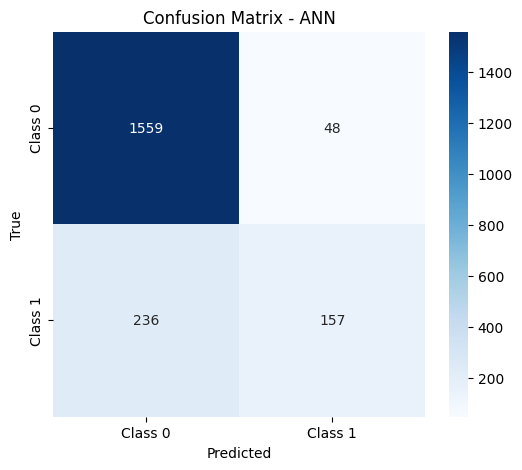

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Step 4: Visualize confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ANN')
plt.show()

In [25]:
model.save('model.h5')

c:\anaconda\envs\photoguard\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
## Load Tensorboard Extension
%load_ext tensorboard

In [28]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 24064), started 0:00:38 ago. (Use '!kill 24064' to kill it.)

In [29]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


--- Random Forest ---
Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [30]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
print("--- SVM ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


--- SVM ---
Accuracy: 0.856
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



In [31]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test)
print("--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression ---
Accuracy: 0.811
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression

# # Define parameter grids
# param_grid_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20]
# }

# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf']
# }

# param_grid_lr = {
#     'C': [0.1, 1, 10],
#     'solver': ['liblinear', 'lbfgs']
# }

# # GridSearch for Random Forest
# grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
# grid_rf.fit(X_train, y_train)
# print("Best RF Parameters:", grid_rf.best_params_)
# print("Best RF Accuracy:", grid_rf.best_score_)

# # GridSearch for SVM
# grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
# grid_svm.fit(X_train, y_train)
# print("Best SVM Parameters:", grid_svm.best_params_)
# print("Best SVM Accuracy:", grid_svm.best_score_)

# # GridSearch for Logistic Regression
# grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='accuracy')
# grid_lr.fit(X_train, y_train)
# print("Best LR Parameters:", grid_lr.best_params_)
# print("Best LR Accuracy:", grid_lr.best_score_)

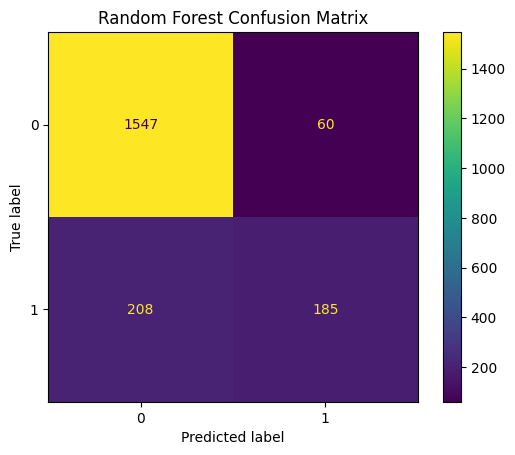

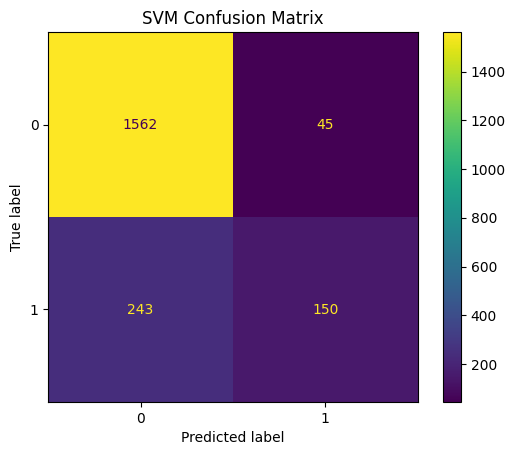

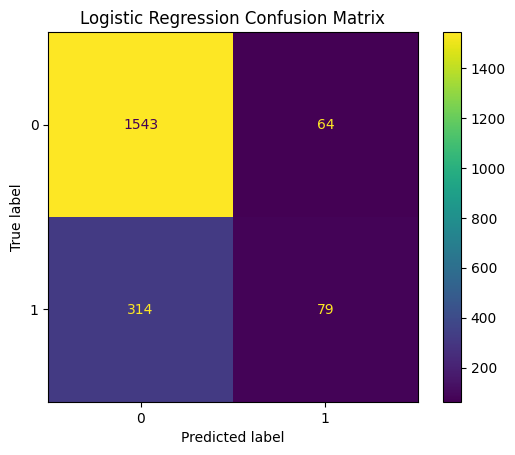

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [39]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("ANN Confusion Matrix")
plt.show()

ValueError: ConfusionMatrixDisplay.from_estimator only supports classifiers

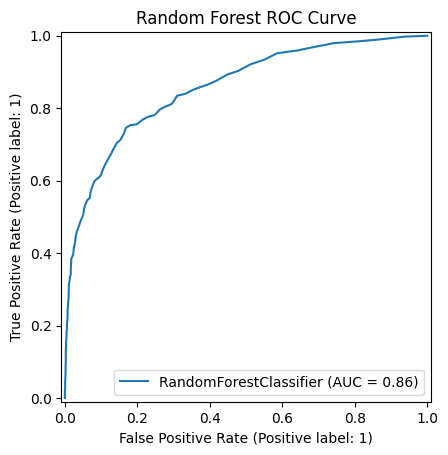

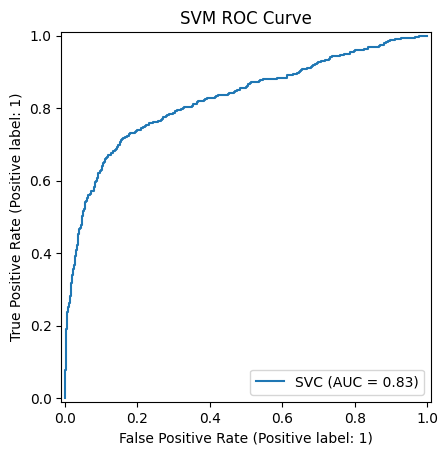

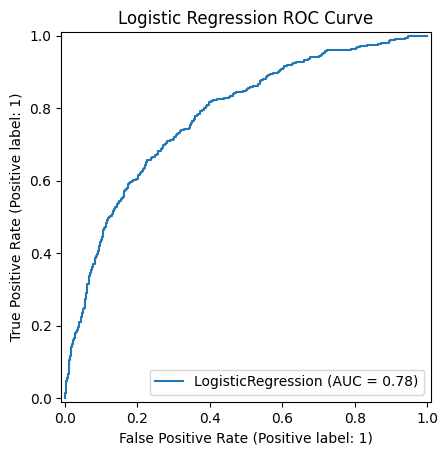

In [35]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

RocCurveDisplay.from_estimator(svm, X_test, y_test)
plt.title("SVM ROC Curve")
plt.show()

RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title("Logistic Regression ROC Curve")
plt.show()

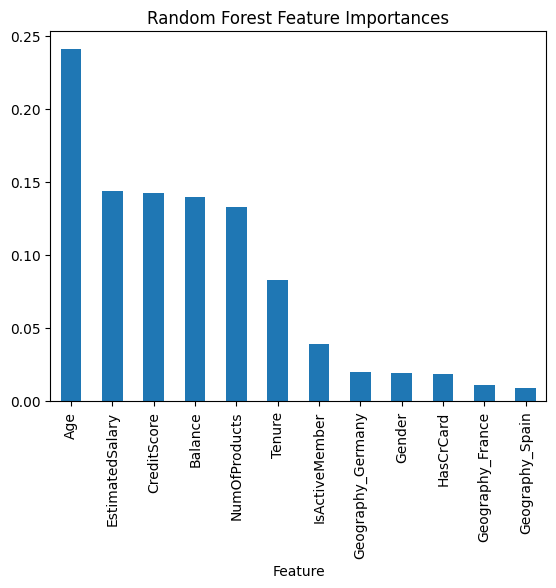

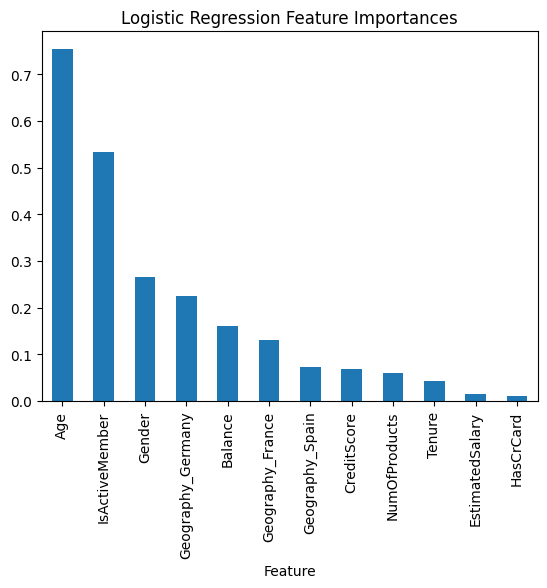

In [36]:
import pandas as pd

# Feature Importance for Random Forest
importances_rf = rf.feature_importances_
features = X.columns

importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

importance_df_rf.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Random Forest Feature Importances")
plt.show()

# For Logistic Regression (absolute value of coefficients)
importances_lr = abs(lr.coef_[0])

importance_df_lr = pd.DataFrame({
    'Feature': features,
    'Importance': importances_lr
}).sort_values(by='Importance', ascending=False)

importance_df_lr.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Logistic Regression Feature Importances")
plt.show()

In [38]:
# import seaborn as sns

# # Example for Random Forest GridSearch
# results = pd.DataFrame(grid_rf.cv_results_)
# pivot_table = results.pivot_table(values='mean_test_score', 
#                                   index='param_max_depth', 
#                                   columns='param_n_estimators')

# sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
# plt.title("Random Forest Grid Search Results")
# plt.show()